# Neural Network Project
## Part 3: Artificial Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_dataset(path):
    data = pd.read_csv(path, engine='python', sep=r',\s*', na_values=['?'])
    
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)

    # unnecessary columns
    data.drop(["fnlwgt", "education"], axis=1, inplace=True)
    
    # outliers
    data = data[data["capital-gain"] != 9999]
    
    return data

In [3]:
data = read_dataset('income_evaluation.csv')
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Prepare and split data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
X = data.drop(['income'], axis=1)
y = data['income'].values

y[y=='<=50K'] = 0
y[y=='>50K'] = 1

X = pd.get_dummies(X, drop_first=True)

print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (30139, 80) y.shape: (30139,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train: {} y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {} y_test: {}".format(X_test.shape, y_test.shape))

X_train: (25618, 80) y_train: (25618,)
X_test: (4521, 80) y_test: (4521,)


### auxiliary functions

In [7]:
def eval_model(model):
    print("Evaluation on test")
    results = model.evaluate(X_test, y_test)
    for metric_name, result in zip(model.metrics_names, results):
        print("{}: {:.10f}".format(metric_name, result))

        
def plot_learn_curves(history, metrics):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    for metric in metrics:
        ax1.plot(history.history[metric], label=metric)
        ax2.plot(history.history["val_"+metric], label="val_"+metric)

    ax1.set_title("train")
    ax2.set_title("validation")

    for ax in (ax1, ax2):        
        ax.set_ylim(0, 1)
        ax.grid(True)
        ax.legend(loc="lower left")

    plt.show()

### Neural Network

In [8]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [9]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Activation
from keras.callbacks import History, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision, Recall

Using TensorFlow backend.


In [10]:
history_simple = History()
model_simple = Sequential([
    InputLayer(input_shape=(X_train.shape[1:])),
    Dense(64, activation='sigmoid'),
    Dense(8, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model_simple.summary()

model_simple.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 5,713
Trainable params: 5,713
Non-trainable params: 0
_________________________________________________________________


In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=0)

model_simple.fit(X_train, y_train, 
                 validation_split=0.1,
                 batch_size=64, 
                 epochs=100, 
                 callbacks=[early_stopping, history_simple])

Train on 23056 samples, validate on 2562 samples
Epoch 1/100
23056/23056 [==============================] - 2s 70us/step - loss: 0.5095 - accuracy: 0.7560 - precision: 0.2366 - recall: 0.0015 - val_loss: 0.4267 - val_accuracy: 0.7974 - val_precision: 0.8052 - val_recall: 0.0358
Epoch 2/100
23056/23056 [==============================] - 1s 53us/step - loss: 0.3978 - accuracy: 0.8192 - precision: 0.7296 - recall: 0.1633 - val_loss: 0.3825 - val_accuracy: 0.8259 - val_precision: 0.6993 - val_recall: 0.2653
Epoch 3/100
23056/23056 [==============================] - 1s 54us/step - loss: 0.3760 - accuracy: 0.8268 - precision: 0.6920 - recall: 0.3255 - val_loss: 0.3708 - val_accuracy: 0.8271 - val_precision: 0.6874 - val_recall: 0.3711
Epoch 4/100
23056/23056 [==============================] - 1s 52us/step - loss: 0.3670 - accuracy: 0.8282 - precision: 0.6852 - recall: 0.4020 - val_loss: 0.3631 - val_accuracy: 0.8298 - val_precision: 0.6835 - val_recall: 0.4265
Epoch 5/100
23056/23056 [======

23056/23056 [==============================] - 1s 52us/step - loss: 0.3235 - accuracy: 0.8469 - precision: 0.7135 - recall: 0.6030 - val_loss: 0.3267 - val_accuracy: 0.8462 - val_precision: 0.7137 - val_recall: 0.6032
Epoch 37/100
23056/23056 [==============================] - 1s 52us/step - loss: 0.3230 - accuracy: 0.8485 - precision: 0.7139 - recall: 0.6033 - val_loss: 0.3252 - val_accuracy: 0.8489 - val_precision: 0.7141 - val_recall: 0.6036


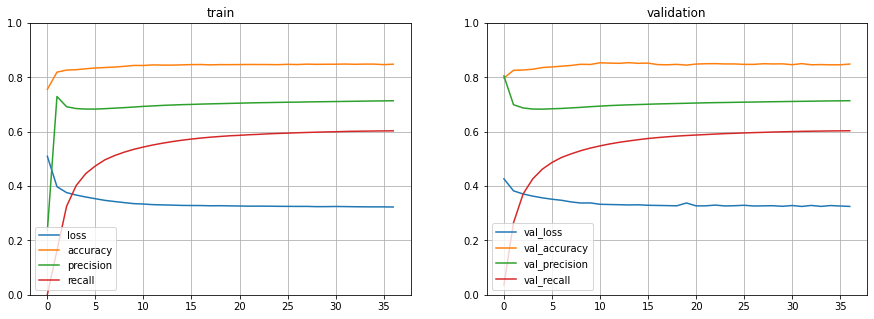

Evaluation on test
4521/4521 [==============================] - 0s 48us/step
loss: 0.3221636431
accuracy: 0.8493695855
precision: 0.7142172456
recall: 0.6037194729


In [12]:
plot_learn_curves(history_simple, model_simple.metrics_names)
eval_model(model_simple)

In [13]:
history_he_elu = History()
model_he_elu = Sequential([
    InputLayer(input_shape=(X_train.shape[1:])),
    Dense(64, use_bias=False, kernel_initializer="he_normal", activity_regularizer=regularizers.l2(1e-6)),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.2),
    Dense(32, use_bias=False, kernel_initializer="he_normal", activity_regularizer=regularizers.l2(1e-6)),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid', kernel_initializer="normal")
])
    
    
model_he_elu.summary()

model_he_elu.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                5120      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
activation_2 (Activation)    (None, 32)               

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=0)

model_he_elu.fit(X_train, y_train,  
           validation_split=0.1,
           batch_size=64, 
           epochs=100, 
           callbacks=[early_stopping, history_he_elu])

Train on 23056 samples, validate on 2562 samples
Epoch 1/100
23056/23056 [==============================] - 3s 121us/step - loss: 0.4414 - accuracy: 0.7916 - precision_1: 0.4877 - recall_1: 0.6925 - val_loss: 0.3828 - val_accuracy: 0.8333 - val_precision_1: 0.5730 - val_recall_1: 0.6720
Epoch 2/100
23056/23056 [==============================] - 2s 80us/step - loss: 0.3635 - accuracy: 0.8300 - precision_1: 0.5995 - recall_1: 0.6514 - val_loss: 0.3431 - val_accuracy: 0.8489 - val_precision_1: 0.6204 - val_recall_1: 0.6364
Epoch 3/100
23056/23056 [==============================] - 2s 85us/step - loss: 0.3540 - accuracy: 0.8357 - precision_1: 0.6330 - recall_1: 0.6310 - val_loss: 0.3373 - val_accuracy: 0.8454 - val_precision_1: 0.6432 - val_recall_1: 0.6273
Epoch 4/100
23056/23056 [==============================] - 2s 84us/step - loss: 0.3489 - accuracy: 0.8372 - precision_1: 0.6504 - recall_1: 0.6231 - val_loss: 0.3354 - val_accuracy: 0.8497 - val_precision_1: 0.6570 - val_recall_1: 0.620

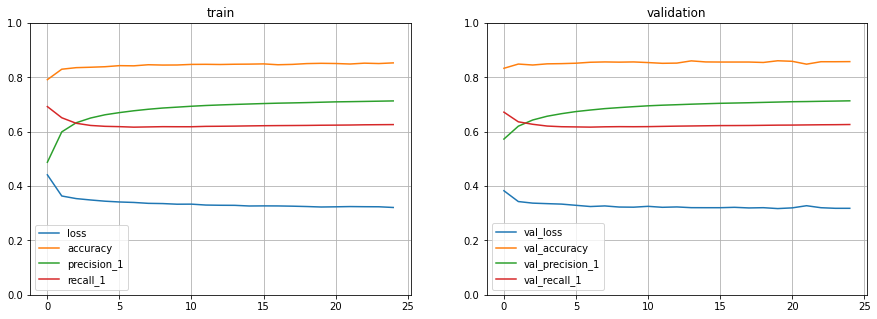

Evaluation on test
4521/4521 [==============================] - 0s 54us/step
loss: 0.3149096678
accuracy: 0.8544569612
precision_1: 0.7137655020
recall_1: 0.6268138885


In [15]:
plot_learn_curves(history_he_elu, model_he_elu.metrics_names)
eval_model(model_he_elu)

In [16]:
history_lecun_selu = History()
model_lecun_selu = Sequential([
    InputLayer(input_shape=(X_train.shape[1:])),
    Dense(64, activation='selu', kernel_initializer="lecun_normal", activity_regularizer=regularizers.l1(1e-4)),
    Dropout(0.1),
    Dense(32, activation='selu', kernel_initializer="lecun_normal", activity_regularizer=regularizers.l1(1e-4)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model_lecun_selu.summary()

model_lecun_selu.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", Precision(), Recall()])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                5184      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_lecun_selu.fit(X_train, y_train,  
           validation_split=0.1,
           batch_size=64, 
           epochs=100, 
           callbacks=[early_stopping, history_lecun_selu])

Train on 23056 samples, validate on 2562 samples
Epoch 1/100
23056/23056 [==============================] - 2s 93us/step - loss: 0.5182 - accuracy: 0.8165 - precision_2: 0.6147 - recall_2: 0.4139 - val_loss: 0.4455 - val_accuracy: 0.8431 - val_precision_2: 0.6793 - val_recall_2: 0.5064
Epoch 2/100
23056/23056 [==============================] - 2s 72us/step - loss: 0.4312 - accuracy: 0.8371 - precision_2: 0.6890 - recall_2: 0.5265 - val_loss: 0.4110 - val_accuracy: 0.8478 - val_precision_2: 0.6975 - val_recall_2: 0.5441
Epoch 3/100
23056/23056 [==============================] - 2s 74us/step - loss: 0.4072 - accuracy: 0.8422 - precision_2: 0.7026 - recall_2: 0.5523 - val_loss: 0.3937 - val_accuracy: 0.8482 - val_precision_2: 0.7079 - val_recall_2: 0.5580
Epoch 4/100
23056/23056 [==============================] - 2s 72us/step - loss: 0.3946 - accuracy: 0.8432 - precision_2: 0.7114 - recall_2: 0.5607 - val_loss: 0.3955 - val_accuracy: 0.8431 - val_precision_2: 0.7145 - val_recall_2: 0.5632

23056/23056 [==============================] - 2s 67us/step - loss: 0.3487 - accuracy: 0.8455 - precision_2: 0.7332 - recall_2: 0.5857 - val_loss: 0.3459 - val_accuracy: 0.8536 - val_precision_2: 0.7332 - val_recall_2: 0.5858
Epoch 36/100
23056/23056 [==============================] - 1s 63us/step - loss: 0.3500 - accuracy: 0.8468 - precision_2: 0.7333 - recall_2: 0.5860 - val_loss: 0.3472 - val_accuracy: 0.8474 - val_precision_2: 0.7334 - val_recall_2: 0.5860
Epoch 37/100
23056/23056 [==============================] - 1s 64us/step - loss: 0.3488 - accuracy: 0.8463 - precision_2: 0.7335 - recall_2: 0.5860 - val_loss: 0.3499 - val_accuracy: 0.8474 - val_precision_2: 0.7335 - val_recall_2: 0.5863
Epoch 38/100
23056/23056 [==============================] - 2s 66us/step - loss: 0.3504 - accuracy: 0.8475 - precision_2: 0.7334 - recall_2: 0.5864 - val_loss: 0.3431 - val_accuracy: 0.8486 - val_precision_2: 0.7336 - val_recall_2: 0.5866
Epoch 39/100
23056/23056 [==============================]

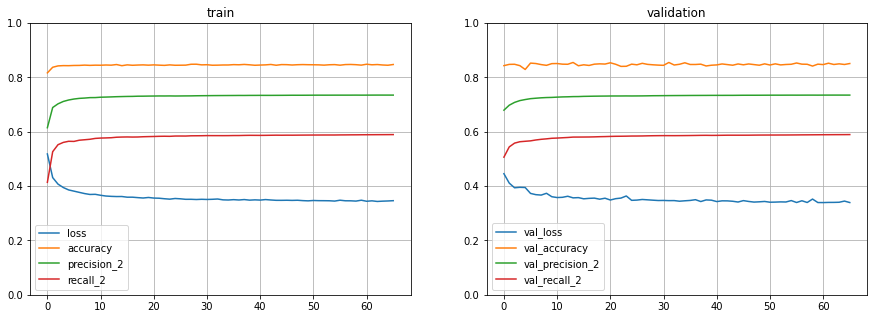

Evaluation on test
4521/4521 [==============================] - 0s 43us/step
loss: 0.3306094600
accuracy: 0.8471577168
precision_2: 0.7347612381
recall_2: 0.5895260572


In [18]:
plot_learn_curves(history_lecun_selu, model_lecun_selu.metrics_names)
eval_model(model_lecun_selu)

In [19]:
history_lr_schedule = History()

model_lr_schedule = Sequential([
    InputLayer(input_shape=(X_train.shape[1:])),
    Dense(64, use_bias=False, kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.2),
    Dense(32, use_bias=False, kernel_initializer="he_normal"),
    BatchNormalization(),
    Activation('sigmoid'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_lr_schedule.summary()

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9,
)

Adam = keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.08, beta_2=0.92, amsgrad=True)

model_lr_schedule.compile(loss='binary_crossentropy', optimizer=Adam, metrics=["accuracy", Precision(), Recall()])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                5120      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2048      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_4 (Activation)    (None, 32)               

In [20]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=0)

model_lr_schedule.fit(X_train, y_train,  
           validation_split=0.1,
           batch_size=128, 
           epochs=100, 
           callbacks=[early_stopping, history_lr_schedule])

Train on 23056 samples, validate on 2562 samples
Epoch 1/100
23056/23056 [==============================] - 1s 61us/step - loss: 0.3701 - accuracy: 0.8243 - precision_3: 0.6422 - recall_3: 0.4911 - val_loss: 0.3616 - val_accuracy: 0.8404 - val_precision_3: 0.6742 - val_recall_3: 0.5742
Epoch 2/100
23056/23056 [==============================] - 1s 38us/step - loss: 0.3477 - accuracy: 0.8365 - precision_3: 0.6804 - recall_3: 0.5903 - val_loss: 0.3492 - val_accuracy: 0.8376 - val_precision_3: 0.6824 - val_recall_3: 0.5986
Epoch 3/100
23056/23056 [==============================] - 1s 37us/step - loss: 0.3420 - accuracy: 0.8401 - precision_3: 0.6843 - recall_3: 0.6053 - val_loss: 0.3302 - val_accuracy: 0.8544 - val_precision_3: 0.6883 - val_recall_3: 0.6085
Epoch 4/100
23056/23056 [==============================] - 1s 37us/step - loss: 0.3366 - accuracy: 0.8413 - precision_3: 0.6905 - recall_3: 0.6107 - val_loss: 0.3282 - val_accuracy: 0.8517 - val_precision_3: 0.6927 - val_recall_3: 0.6130

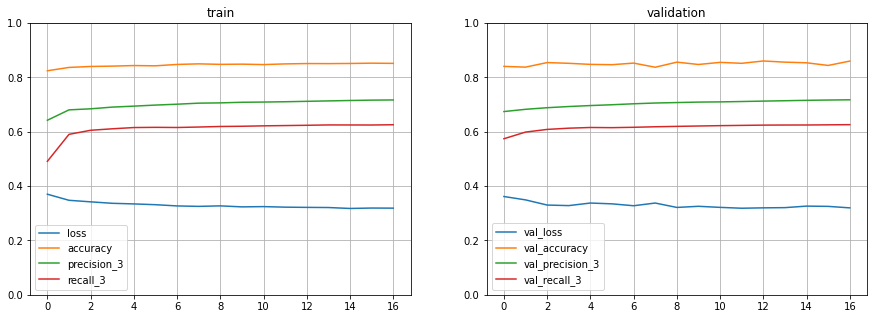

Evaluation on test
4521/4521 [==============================] - 0s 81us/step
loss: 0.3171340948
accuracy: 0.8502543569
precision_3: 0.7179220915
recall_3: 0.6256644726


In [21]:
plot_learn_curves(history_lr_schedule, model_lr_schedule.metrics_names)
eval_model(model_lr_schedule)

In [22]:
models = []
models.append(('simple model', model_simple))
models.append(('model he elu', model_he_elu))
models.append(('model lecun selu', model_lecun_selu))
models.append(('model lr schedule', model_lr_schedule))


model_accuracy, model_loss, model_name = [], [], [] 
model_precision, model_recall, model_f1_score = [], [], []
        

for name, model in models:
    loss, acc, precision, recall = model.evaluate(X_test, y_test)
    f1_score = 2*precision*recall/(precision+recall)
    
    model_name.append(name)
    model_precision.append(precision)
    model_recall.append(recall)
    model_f1_score.append(f1_score)
    model_accuracy.append(acc)
    model_loss.append(loss)
    

4521/4521 [==============================] - 0s 94us/step


In [23]:
d = {
    'model': model_name,
    'precision': model_precision,
    'recall': model_recall,
    'f1_score': model_f1_score,
    'loss': model_loss,
    'accuracy_score' : model_accuracy,
    }
df = pd.DataFrame(data=d)
df

,model,precision,recall,f1_score,loss,accuracy_score
0,simple model,0.714317,0.603884,0.654474,0.322164,0.849370
1,model he elu,0.713865,0.627221,0.667744,0.314910,0.854457
2,model lecun selu,0.734785,0.589577,0.654220,0.330609,0.847158
3,model lr schedule,0.718450,0.625134,0.668552,0.317134,0.850254
